In [1067]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1068]:
# Loading data
file_path = 'Housing_DS.csv'
full_data_table = pd.read_csv(file_path)
print(full_data_table.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [1069]:
# Selection of features and target variable
y_column = np.array(full_data_table['price']).reshape(-1, 1)
x_columns = full_data_table[['area', 'bathrooms', 'bedrooms']]

# Normalizing
x_columns = (x_columns - x_columns.mean()) / x_columns.std()
# y_mean = y_column.mean()
# y_std = y_column.std()
# y_column = (y_column - y_mean) / y_std

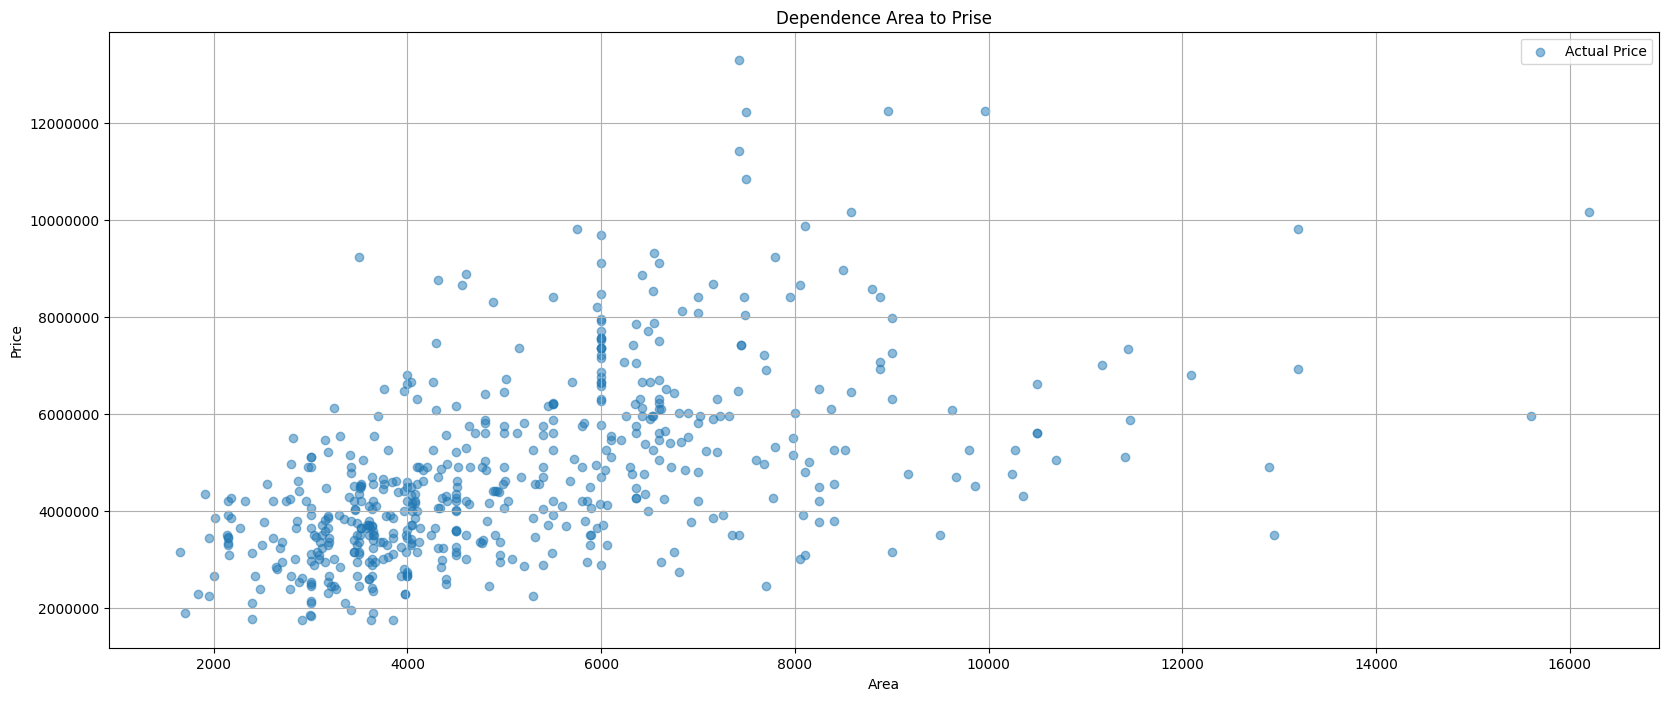

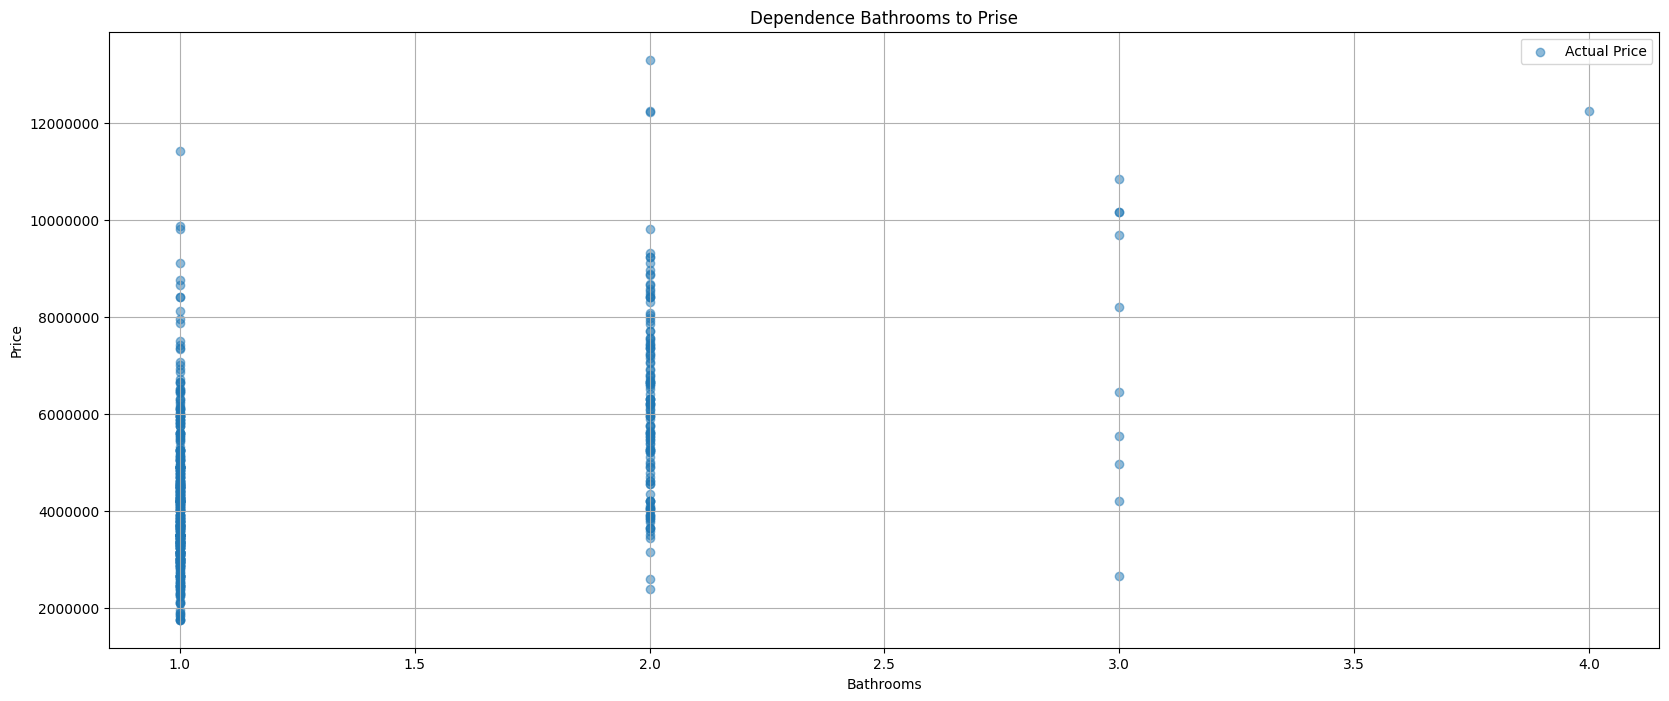

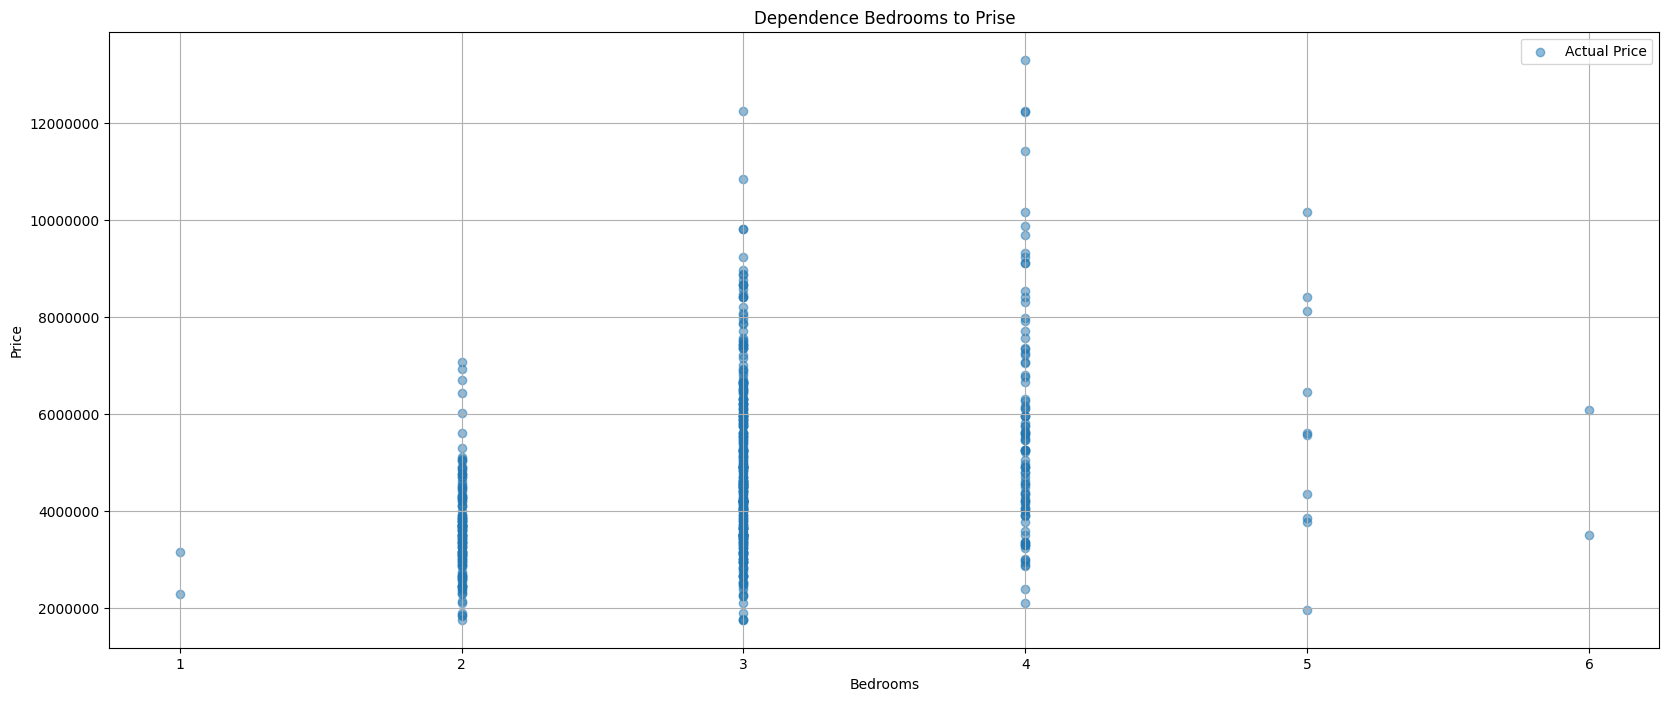

In [1070]:
# Graphing the dependence of each feature on the price
for column in x_columns.columns:
    plt.figure(figsize=(20, 8))
    plt.scatter(full_data_table[column], y_column, alpha=0.5, label='Actual Price')
    plt.title(f'Dependence {column.capitalize()} to Prise')
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

In [1071]:
# Conversion to NumPy arrays
X = np.array(x_columns)
y = np.array(y_column).reshape(-1, 1)

In [1072]:
# Adding bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [1073]:
# Initialize parameters
initial_theta = np.random.randn(X.shape[1], 1)
alpha = 0.001
num_iterations = 1000

In [1074]:
# Linear regression hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

In [1075]:
# Function to calculate the loss function
def compute_loss(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

In [1076]:
# Implementation of one step of gradient descent
def gradient_descent_step(X, y, theta, alpha):
    m = len(y)
    predictions = hypothesis(X, theta)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    theta -= alpha * gradient
    return theta

In [1077]:
# Finding the best parameters with gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    loss_history = []
    for i in range(num_iterations):
        theta = gradient_descent_step(X, y, theta, alpha)
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)
    return theta, loss_history

# Performing gradient descent
theta, loss_history = gradient_descent(X, y, initial_theta, alpha, num_iterations)
print(f'Obtained parameters (gradient descent): {theta.flatten()}')

Obtained parameters (gradient descent): [3014024.19177748  568181.22220339  510639.98010883  312406.08890434]


In [1078]:
# Finding parameters using an analytical solution
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

theta_analytical = normal_equation(X, y)
print(f'Obtained parameters (analytical solution): {theta_analytical.flatten()}')

Obtained parameters (analytical solution): [4766729.24770642  821968.58935343  696447.75898579  300259.16468032]


In [1079]:
# Comparison of parameters
print(f'Parameters from gradient descent: {theta.flatten()}')
print(f'Parameters from the analytical solution: {theta_analytical.flatten()}')

Parameters from gradient descent: [3014024.19177748  568181.22220339  510639.98010883  312406.08890434]
Parameters from the analytical solution: [4766729.24770642  821968.58935343  696447.75898579  300259.16468032]


In [1080]:
# Calculation of the loss function for both methods
loss_gradient_descent = compute_loss(X, y, theta)
loss_analytical = compute_loss(X, y, theta_analytical)

print(f'Loss function (gradient descent): {loss_gradient_descent}')
print(f'Loss function (analytical solution): {loss_analytical}')

Loss function (gradient descent): 2488834914613.625
Loss function (analytical solution): 895585024988.6597


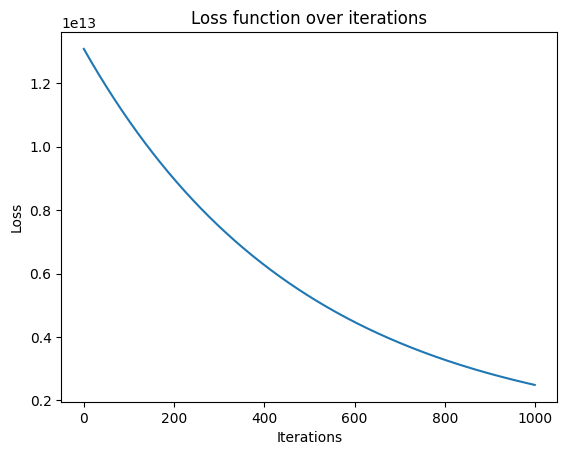

In [1081]:
# Graph of the loss function
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss function over iterations')
plt.show()

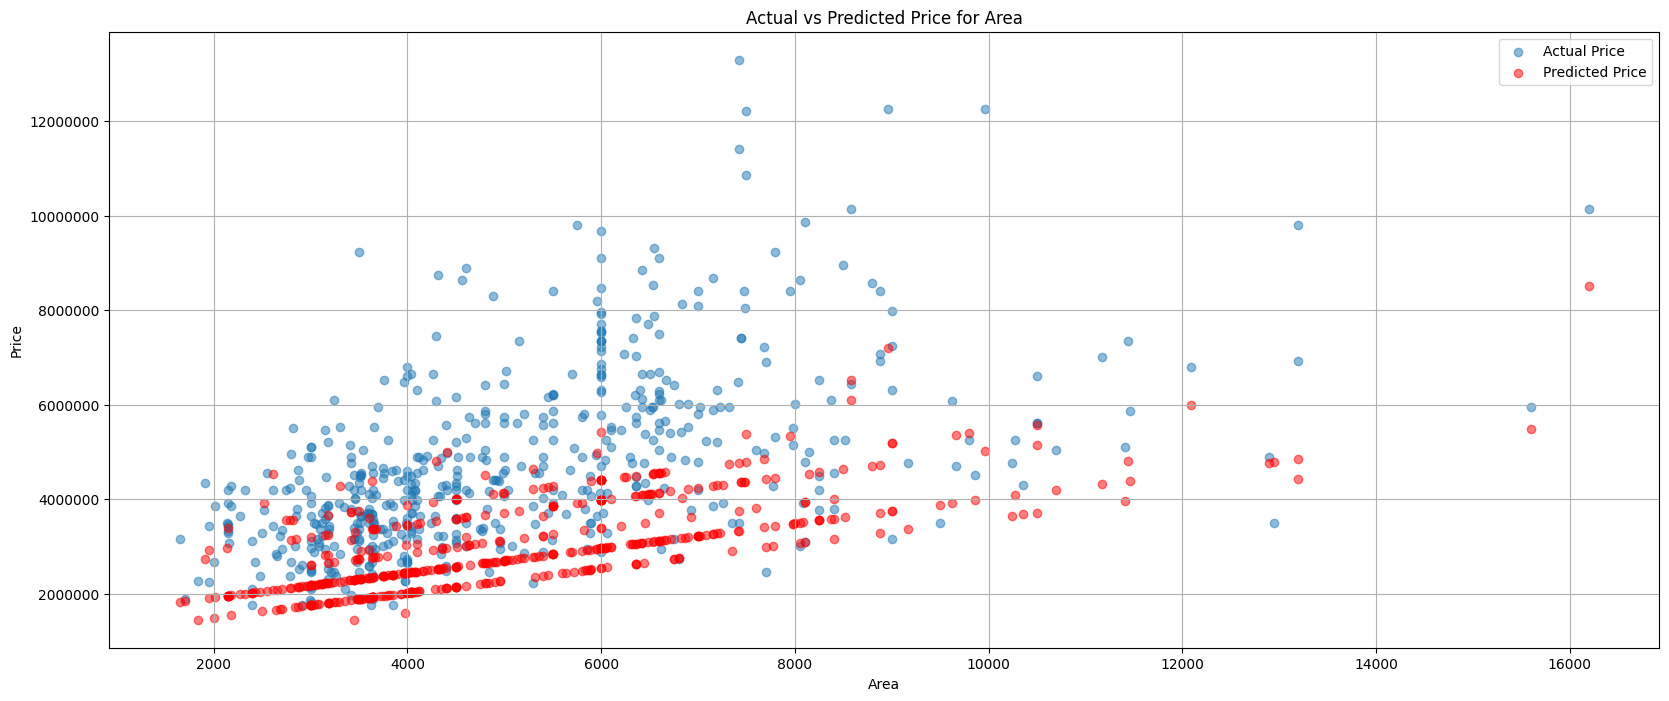

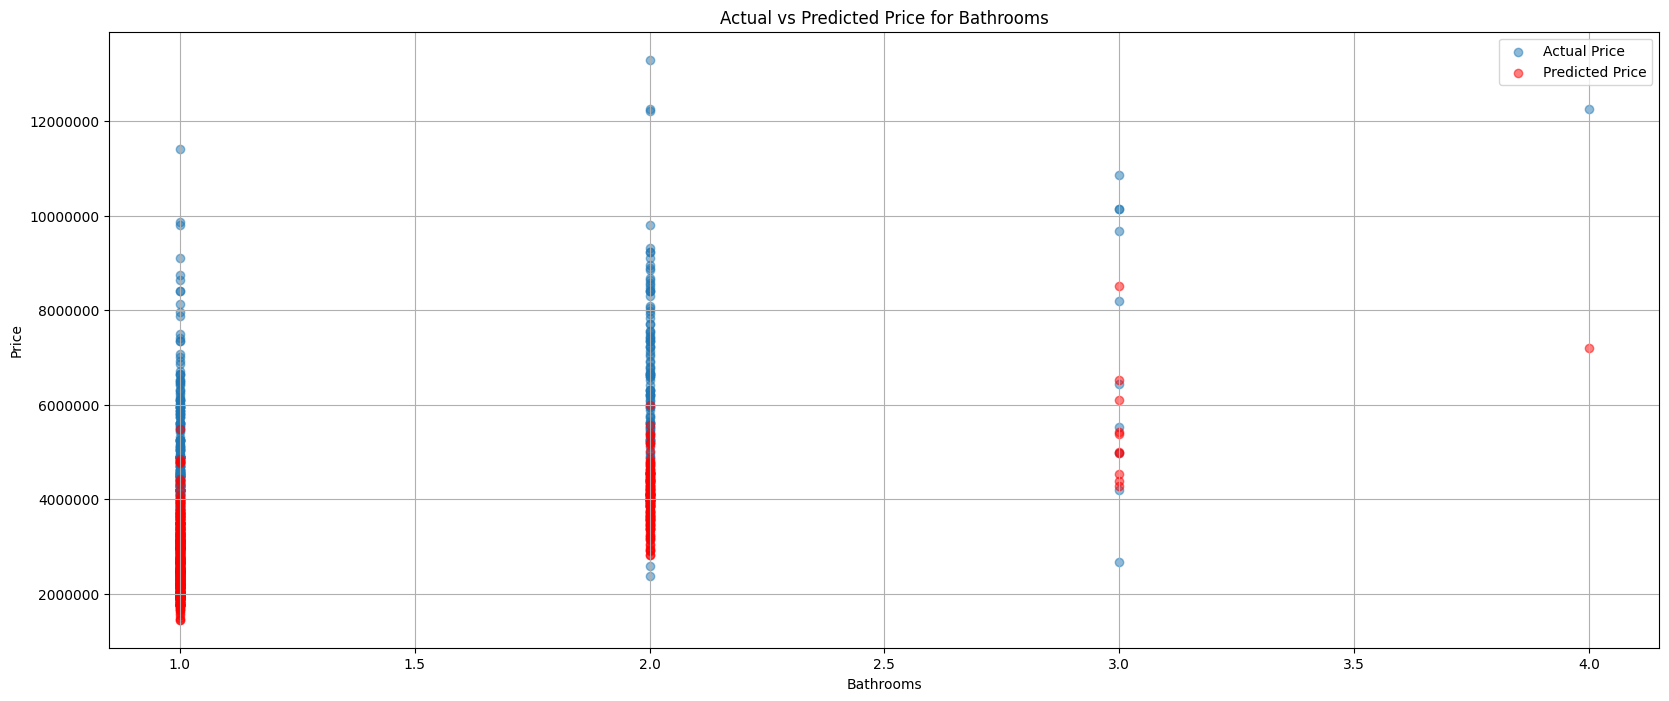

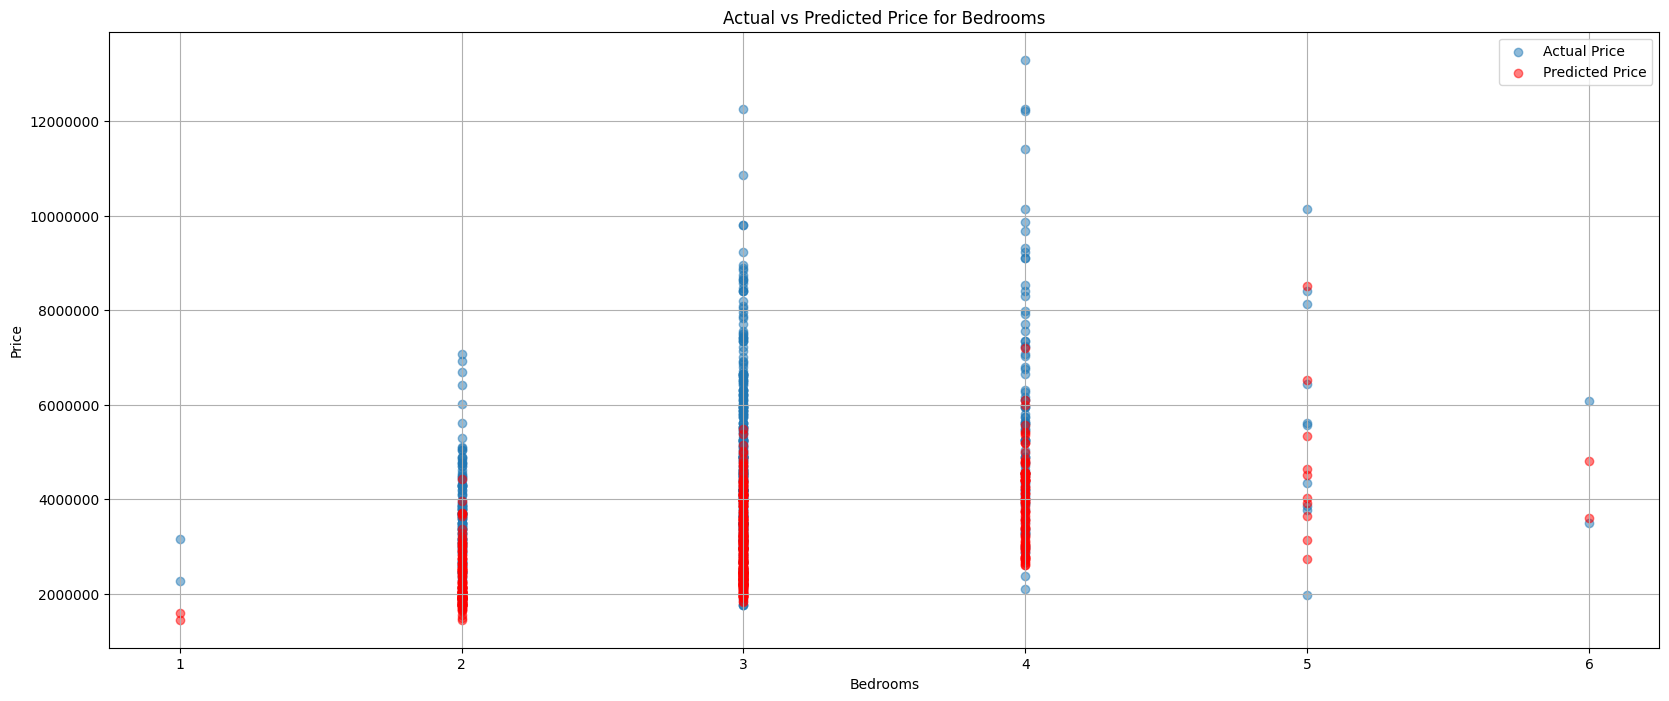

In [1082]:
# Visualization of predicted values
prediction = hypothesis(X, theta)

for i, column in enumerate(x_columns.columns):
    plt.figure(figsize=(20, 8))
    plt.scatter(full_data_table[column], y, alpha=0.5, label='Actual Price')
    plt.scatter(full_data_table[column], prediction, alpha=0.5, color='red', label='Predicted Price')
    plt.title(f'Actual vs Predicted Price for {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()